In [120]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from cholesky import Cholesky
from imutils import img2array, array2img
from interpolation import affine_grid_generator, bilinear_sampler

In [121]:
def process(coords):
    """
    Process the coordinates as:

    - y: the coordinates of the crooked image
    - x: the coordinates of the reference image
    """
    x = [[l[0][0], l[0][1]] for l in coords]
    y = [[l[1][0], l[1][1]] for l in coords]

    x = np.array(x)
    y = np.array(y)
    
    # homogenize coordinates
    y = np.append(y, np.ones((y.shape[0],1)), axis=1)

    return x, y

In [122]:
# read the pickle dump and process
coords = pickle.load(open("./dump/coords.p", "rb"))
x, y = process(coords)

In [127]:
M = np.linalg.lstsq(x, y)[0]

In [128]:
M

array([[  4.53633058e-01,   2.32228618e-02,   1.01525316e-03],
       [  2.21160226e-01,   9.73617612e-01,   9.06889929e-04]])

In [115]:
M = np.hstack((M, np.zeros((M.shape[0], 1), dtype=M.dtype)))


In [116]:
M

array([[ 0.45363306,  0.02322286,  0.        ],
       [ 0.22116023,  0.97361761,  0.        ]])

In [61]:
print(x)
print("\n")
print(y)

[[ 411.11290323  259.69354839]
 [ 528.20967742  280.98387097]
 [ 375.62903226  401.62903226]
 [ 425.30645161  745.82258065]
 [ 528.20967742  327.11290323]
 [ 691.43548387  540.01612903]
 [ 584.98387097  536.46774194]
 [ 492.72580645  685.5       ]
 [  63.37096774  586.14516129]
 [ 333.0483871   440.66129032]
 [ 343.69354839  504.53225806]
 [ 663.0483871   433.56451613]
 [ 723.37096774  387.43548387]
 [ 687.88709677  114.20967742]
 [ 471.43548387  238.40322581]
 [ 705.62903226  469.0483871 ]
 [ 606.27419355  600.33870968]
 [ 730.46774194  749.37096774]]


[[ 533.37096774  401.62903226    1.        ]
 [ 504.98387097  529.37096774    1.        ]
 [ 125.30645161  486.79032258    1.        ]
 [ 299.17741935  671.30645161    1.        ]
 [ 402.08064516  291.62903226    1.        ]
 [ 231.75806452  536.46774194    1.        ]
 [ 253.0483871   713.88709677    1.        ]
 [ 434.01612903  752.91935484    1.        ]
 [ 458.85483871  561.30645161    1.        ]
 [ 416.27419355  440.66129032    1

In [62]:
print(x.shape)
print(y.shape)

(18, 2)
(18, 3)


In [63]:
num_pts = y.shape[0]
C = []
for i in range(num_pts):
    C.append(np.hstack([y[i], np.zeros(3).T]))
    C.append(np.hstack([np.zeros(3).T, y[i]]))
C = np.array(C)
d = x.flatten()

In [64]:
C

array([[ 533.37096774,  401.62903226,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  533.37096774,
         401.62903226,    1.        ],
       [ 504.98387097,  529.37096774,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  504.98387097,
         529.37096774,    1.        ],
       [ 125.30645161,  486.79032258,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  125.30645161,
         486.79032258,    1.        ],
       [ 299.17741935,  671.30645161,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  299.17741935,
         671.30645161,    1.        ],
       [ 402.08064516,  291.62903226,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,

In [65]:
d

array([ 411.11290323,  259.69354839,  528.20967742,  280.98387097,
        375.62903226,  401.62903226,  425.30645161,  745.82258065,
        528.20967742,  327.11290323,  691.43548387,  540.01612903,
        584.98387097,  536.46774194,  492.72580645,  685.5       ,
         63.37096774,  586.14516129,  333.0483871 ,  440.66129032,
        343.69354839,  504.53225806,  663.0483871 ,  433.56451613,
        723.37096774,  387.43548387,  687.88709677,  114.20967742,
        471.43548387,  238.40322581,  705.62903226,  469.0483871 ,
        606.27419355,  600.33870968,  730.46774194,  749.37096774])

In [66]:
A = np.dot(C.T, C)
b = np.dot(C.T, d)

In [67]:
M = Cholesky(A).solve(b)

In [68]:
M = M.reshape(2, 3)
M

array([[ -9.66095849e-02,  -1.77006874e-01,   6.38337479e+02],
       [ -9.03525883e-02,   7.42687048e-01,   1.46066317e+02]])

In [129]:
cat_dir = './imgs/'
filepath = os.path.join(cat_dir, 'crooked_cat.png')
img = img2array(filepath, desired_size=(1000, 1000))

In [130]:
img.shape

(1000, 1000, 3)

In [131]:
height = 1000
width = 1000

In [132]:
affine_grid = affine_grid_generator(1000, 1000, M)

Transformation Matrix: (2, 3)
Sampling Grid: (3, 1000000)
Affine Grid: (2, 1000, 1000)


In [133]:
x_s = affine_grid[0:1, :].squeeze()
y_s = affine_grid[1:2, :].squeeze()

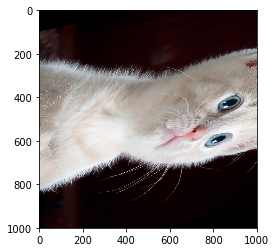

In [134]:
out = bilinear_sampler(img, x_s, y_s)
plt.imshow(out)
plt.show()